In [3]:
import mne

In [4]:
raw = mne.io.read_raw_gdf('BCICIV_2a/A01T.gdf', eog = ['EOG-left', 'EOG-central', 'EOG-right'])

Extracting GDF parameters from BCICIV_2a/A01T.gdf...
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


c:\Users\MrKillShOtzz\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [5]:
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

<RawGDF | A01T.gdf, 22 x 672528 (2690.1 s), ~22 KiB, data not loaded>

In [6]:
events = mne.events_from_annotations(raw)
events

Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]


(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 29683,      0,      5],
        ...,
        [670550,      0,      6],
        [670550,      0,      1],
        [671050,      0,      7]], shape=(603, 3)),
 {np.str_('1023'): 1,
  np.str_('1072'): 2,
  np.str_('276'): 3,
  np.str_('277'): 4,
  np.str_('32766'): 5,
  np.str_('768'): 6,
  np.str_('769'): 7,
  np.str_('770'): 8,
  np.str_('771'): 9,
  np.str_('772'): 10})

In [7]:
event_dict = {
    'reject':1,
    'eye move':2,
    'eye open':3,
    'eye close': 4,
    'new run': 5,
    'new trial':6,
    'class 1': 7,
    'class 2': 8,
    'class 3': 9,
    'class 4': 10,
}

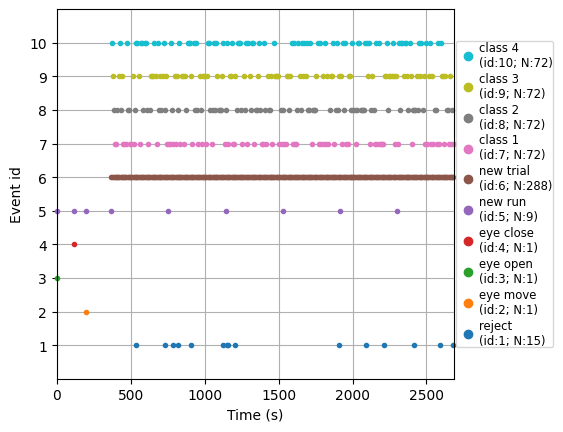

In [8]:
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'], first_samp = raw.first_samp)


In [9]:
epoch = mne.Epochs(raw, events[0], event_id=[7,8,9,10])

Not setting metadata
288 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


In [10]:
epoch.get_data().shape

Loading data for 288 events and 176 original time points ...
0 bad epochs dropped


(288, 22, 176)

In [11]:
labels = epoch.events[:,-1]

In [12]:
labels

array([10,  9,  8,  7,  7,  8,  9, 10,  8,  9,  7,  7,  7, 10,  8,  8,  7,
        7,  9,  7,  8, 10, 10,  9,  7, 10, 10,  8, 10, 10,  8,  7,  8,  9,
        9,  9, 10,  9,  7, 10,  8,  9,  8,  9, 10,  8,  9,  7,  7,  7, 10,
        8,  7,  9,  7,  9,  8, 10,  7,  9,  9,  7,  9,  8, 10, 10, 10,  9,
        7, 10,  8, 10,  8,  7,  9,  8,  7,  9,  9,  7,  9, 10, 10,  8,  7,
        8, 10,  8, 10,  9,  8,  8,  8,  9, 10,  7,  8, 10,  7,  9,  9, 10,
        7,  7,  9,  8, 10, 10, 10,  8,  7,  9,  8, 10,  7, 10,  9,  8, 10,
       10,  7,  8,  8,  9, 10,  8,  7,  7, 10,  8,  7,  9,  8,  8,  9,  7,
       10,  9,  9,  9,  9,  7,  8,  7,  8,  7,  7,  9,  9,  8,  9, 10,  7,
       10,  7,  7,  8, 10,  9,  8, 10,  9, 10,  9, 10,  8,  8, 10,  7,  8,
        8,  8,  9, 10,  7, 10,  7,  9,  7, 10,  7,  9,  7,  8,  9,  9, 10,
        7,  8, 10,  8,  9,  9,  7, 10,  8, 10,  7,  7,  9,  9,  8, 10,  8,
        8,  7,  8, 10, 10,  8,  8,  8,  8, 10, 10,  9, 10,  7,  8,  9,  8,
        7, 10,  7, 10,  7

In [13]:
evoked_1 = epoch['7'].average()
evoked_2 = epoch['8'].average()
evoked_3 = epoch['9'].average()
evoked_4 = epoch['10'].average()

In [14]:
dicts = {'left':evoked_1, 'right':evoked_2, 'foot':evoked_3, 'tongue':evoked_4}

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


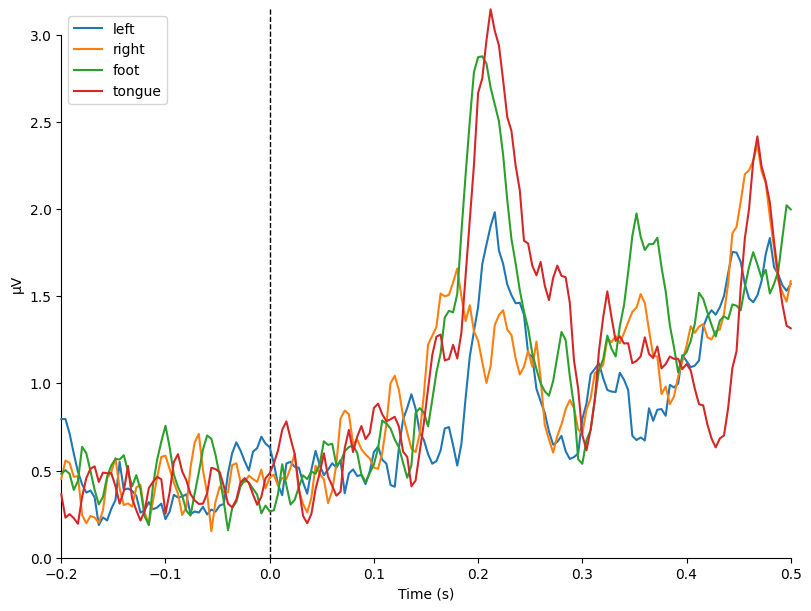

[<Figure size 800x600 with 1 Axes>]

In [15]:
mne.viz.plot_compare_evokeds(dicts)

In [24]:
def read_data(path):
    raw = mne.io.read_raw_gdf(path, eog=['EOG-left', 'EOG-central', 'EOG-right'], preload=True)
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
    
    # Common preprocessing
    raw.filter(l_freq=8, h_freq=30)  # Bandpass mu/beta
    raw.set_eeg_reference('average')  # Or 'CAR'
    
    events, event_id = mne.events_from_annotations(raw)
    
    # Standard event ids for classes (769=left, 770=right, 771=foot, 772=tongue)
    picks = mne.pick_types(raw.info, eeg=True, eog=False)
    
    epochs = mne.Epochs(raw, events, event_id={'769':7, '770':8, '771':9, '772':10},
                        tmin=0, tmax=4,  # Full 4s trial
                        picks=picks, baseline=(0, 0),  # Or (None, 0) for no baseline
                        preload=True, reject=dict(eeg=100e-6))  # Drop bad trials
    
    labels = epochs.events[:, -1] - 6  # Make 1-4 → 0-3 for PyTorch
    features = epochs.get_data()
    
    return features, labels

In [26]:
labels, features = read_data('BCICIV_2a/A04T.gdf')

Extracting GDF parameters from BCICIV_2a/A04T.gdf...
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


c:\Users\MrKillShOtzz\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]


ValueError: No matching events found for 771 (event id 9)

In [ ]:
features.shape

(144, 22, 226)

In [27]:
from pathlib import Path
import numpy as np

def load_all_subjects(data_dir='BCICIV_2a', subject_ids=range(1, 10)):
    all_features = []
    all_labels = []
    subject_indices = []
    
    for subject_id in subject_ids:
        # Format filename (A01T, A02T, etc.)
        filename = f'A{subject_id:02d}T.gdf'
        filepath = Path(data_dir) / filename
        
        try:
            print(f"Loading {filename}...")
            features, labels = read_data(str(filepath))
            
            all_features.append(features)
            all_labels.append(labels)
            
            # Track which subject each trial belongs to
            subject_indices.extend([subject_id] * len(labels))
            
            print(f"  Loaded {len(labels)} trials from subject {subject_id}")
            print(f"  Shape: {features.shape}")
            
        except Exception as e:
            print(f"  Error loading {filename}: {e}")
            continue
    
    # Combine all data
    all_features = np.concatenate(all_features, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    subject_indices = np.array(subject_indices)
    
    print(f"\n{'='*50}")
    print(f"Total: {len(all_labels)} trials from {len(set(subject_indices))} subjects")
    print(f"Features shape: {all_features.shape}")
    print(f"Labels shape: {all_labels.shape}")
    print(f"Label distribution: {np.bincount(all_labels)}")
    print(f"{'='*50}")
    
    return all_features, all_labels, subject_indices

# Usage
features, labels, subjects = load_all_subjects()

Loading A01T.gdf...
Extracting GDF parameters from BCICIV_2a\A01T.gdf...
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\Users\MrKillShOtzz\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from

c:\Users\MrKillShOtzz\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from

c:\Users\MrKillShOtzz\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from

c:\Users\MrKillShOtzz\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
  Error loading A04T.gdf: No matching events found for 771 (event id 9)
Loading A05T.gdf...
Extracting GDF parameters from BCICIV_2a\A05T.gdf...
Setting channel info

c:\Users\MrKillShOtzz\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from

c:\Users\MrKillShOtzz\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from

c:\Users\MrKillShOtzz\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from

c:\Users\MrKillShOtzz\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from

c:\Users\MrKillShOtzz\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from